# The Machine Learning Model

## What is a model?

The word **model** is thrown around loosely in the world of machine learning so depending on the source or context, its definition may vary.

### The most generic definition of a model

In our context, when the word model is mentioned, it will refer to something that helps us **represent the real world**. Models are a simplification of the underlying process to help us gain an understanding about something that we are interested in. For instance, maps model the location of places on earth and help us navigate between different locations. Maps are a great simplifications of the world around us, but provide enough information to complete a task and therefore are useful models. Even rudimentary maps drawn by hand can be enough to navigate between two places.

### Mathematical models

A mathematical model uses mathematical equations, or at a minimum, mathematical language to represent something in the real world. For instance, estimating the volume of a pumpkin by using the equation for a sphere ($\frac{4}{3}\pi r^3$) won't be exact, but will be better than randomly guessing.

## Machine learning models

In this course, we focus on machine learning models, which are a subset of mathematical models that **learn from data**. For instance, if we were interested in modeling the sale price of a house based on its square footage, we would first need to collect data on both the square footage and sale price of many houses. We could then build a mathematical model to help describe the relationship.

### Examples of machine learning models

There are many types of machine learning models that exist to explore the relationship between two variables. Let's see some examples of these expressed with simple language. We use the housing dataset to describe the relationship between square footage and final sale price.

#### Model 1

Use the average sale price of all houses as the estimated final sale price.

#### Model 2

Find the cost per square foot of each house in the dataset. Then, use the average of this statistic to estimate each individual house's sale price.

#### Model 3

Divide houses into 3 groups based on their size - those less than 1,500 square feet, 1,500-2,000, and those over 2,000. For each group, use the average sale price of that group as the estimated sale price.

### All of these models learn from data

The distinguishing feature of all machine learning models is that they must **learn from data**. Each of the models above learns from data. The learning is quite simple, but there is learning, and it comes directly from the data.

## Create each model

The descriptions for the models above provide sufficient mathematical language to implement them programmatically. Let's begin by reading in the data and calculating some of the statistics needed for each model.

In [1]:
import pandas as pd
housing = pd.read_csv('../data/housing_sample.csv')
housing.head()

,Neighborhood,Exterior1st,YearBuilt,LotFrontage,GrLivArea,GarageArea,BedroomAbvGr,FullBath,OverallQual,HeatingQC,SalePrice
0,CollgCr,VinylSd,2003,65.0,1710,548,3,2,7,Ex,208500
1,Veenker,MetalSd,1976,80.0,1262,460,3,2,6,Ex,181500
2,CollgCr,VinylSd,2001,68.0,1786,608,3,2,7,Ex,223500
3,Crawfor,Wd Sdng,1915,60.0,1717,642,3,1,7,Gd,140000
4,NoRidge,VinylSd,2000,84.0,2198,836,4,2,8,Ex,250000


Model 1 requires the average sale price.

In [2]:
mean_price = housing['SalePrice'].mean()
mean_price

180921.19589041095

Model 2 requires the average price per square foot for each house.

In [4]:
price_per_sq_foot = (housing['SalePrice'] / housing['GrLivArea']).mean()
price_per_sq_foot

120.57287807326834

Model 3 requires more prep work. We use the `query` method to find the group of houses that meet each of three conditions and then take the mean of the sale price. The end result is a list of three prices.

In [5]:
group_price = [housing.query('GrLivArea < 1500')['SalePrice'].mean(),
               housing.query('1500 <= GrLivArea <= 2000')['SalePrice'].mean(),
               housing.query('GrLivArea > 2000')['SalePrice'].mean()]
group_price

[139045.93222506394, 205017.30818965516, 281696.2429906542]

### Create functions to make predictions

All three of these models learned from the data by calculating some statistic. Let's create a function for each model that uses the statistic to make a prediction. Each model returns a prediction of the final sale price rounded to the nearest thousand.

In [6]:
def model_1_simple_avg(sq_foot):
    return round(mean_price, -3)

def model_2_avg_ppsf(sq_foot):
    return round(price_per_sq_foot * sq_foot, -3)

def model_3_bin_avg(sq_foot):
    cat = 0 if sq_foot < 1500 else 1 if sq_foot <= 2000 else 2
    return round(group_price[cat], -3)

### Make predictions with the model
Now that the models are created, we can use them to understand the real world. In our case, we can use them to predict the final sale price given the square footage. Let's predict sale prices for both 1,000 and 3,000 square foot houses.

In [7]:
model_1_simple_avg(1000), model_1_simple_avg(3000)

(181000.0, 181000.0)

In [8]:
model_2_avg_ppsf(1000), model_2_avg_ppsf(3000)

(121000.0, 362000.0)

In [9]:
model_3_bin_avg(1000), model_3_bin_avg(3000)

(139000.0, 282000.0)

## Plotting a range of predictions

Instead of calculating just two predictions on for each model, let's calculate several more and plot each model as a line. First, we create a DataFrame with the predicted values for a range of house square footages.

In [10]:
sq_feet = range(1000, 3500, 500)
models = [model_1_simple_avg, model_2_avg_ppsf, model_3_bin_avg]
data = {model.__name__: [model(sq) for sq in sq_feet] for model in models}
df_predictions = pd.DataFrame(data=data, index=sq_feet)
df_predictions

,model_1_simple_avg,model_2_avg_ppsf,model_3_bin_avg
1000,181000.0,121000.0,139000.0
1500,181000.0,181000.0,205000.0
2000,181000.0,241000.0,205000.0
2500,181000.0,301000.0,282000.0
3000,181000.0,362000.0,282000.0


We can now make a plot of each model to help make a visual comparison.

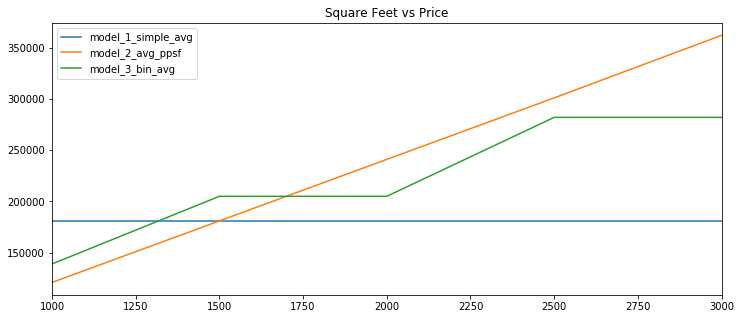

In [11]:
%matplotlib inline
df_predictions.plot(title='Square Feet vs Price', figsize=(12, 5));